# Set up

In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Read in Data
df = pd.read_csv("/..Resources/winequality-red.csv", delimiter=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
# See the number of rows and columns
print("Rows, columns: " + str(df.shape))

# See the first five rows of the dataset
df.head()

Rows, columns: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Missing Values
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# Exploring Variables

In [6]:
# Histogram of 'quality' variable
fig = px.histogram(df,x='quality')
fig.show()

<AxesSubplot:>

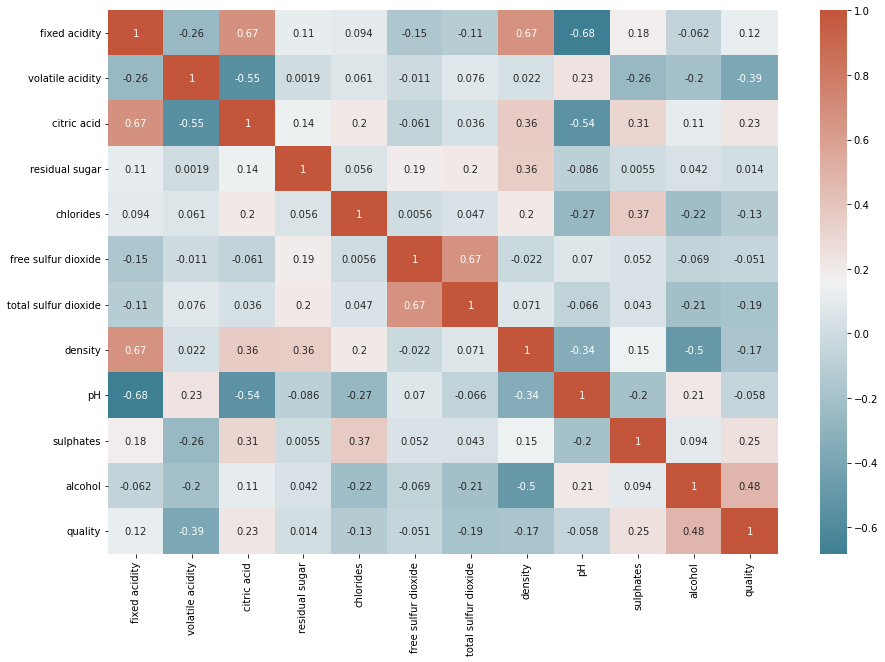

In [14]:
# Correlation Matrix
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

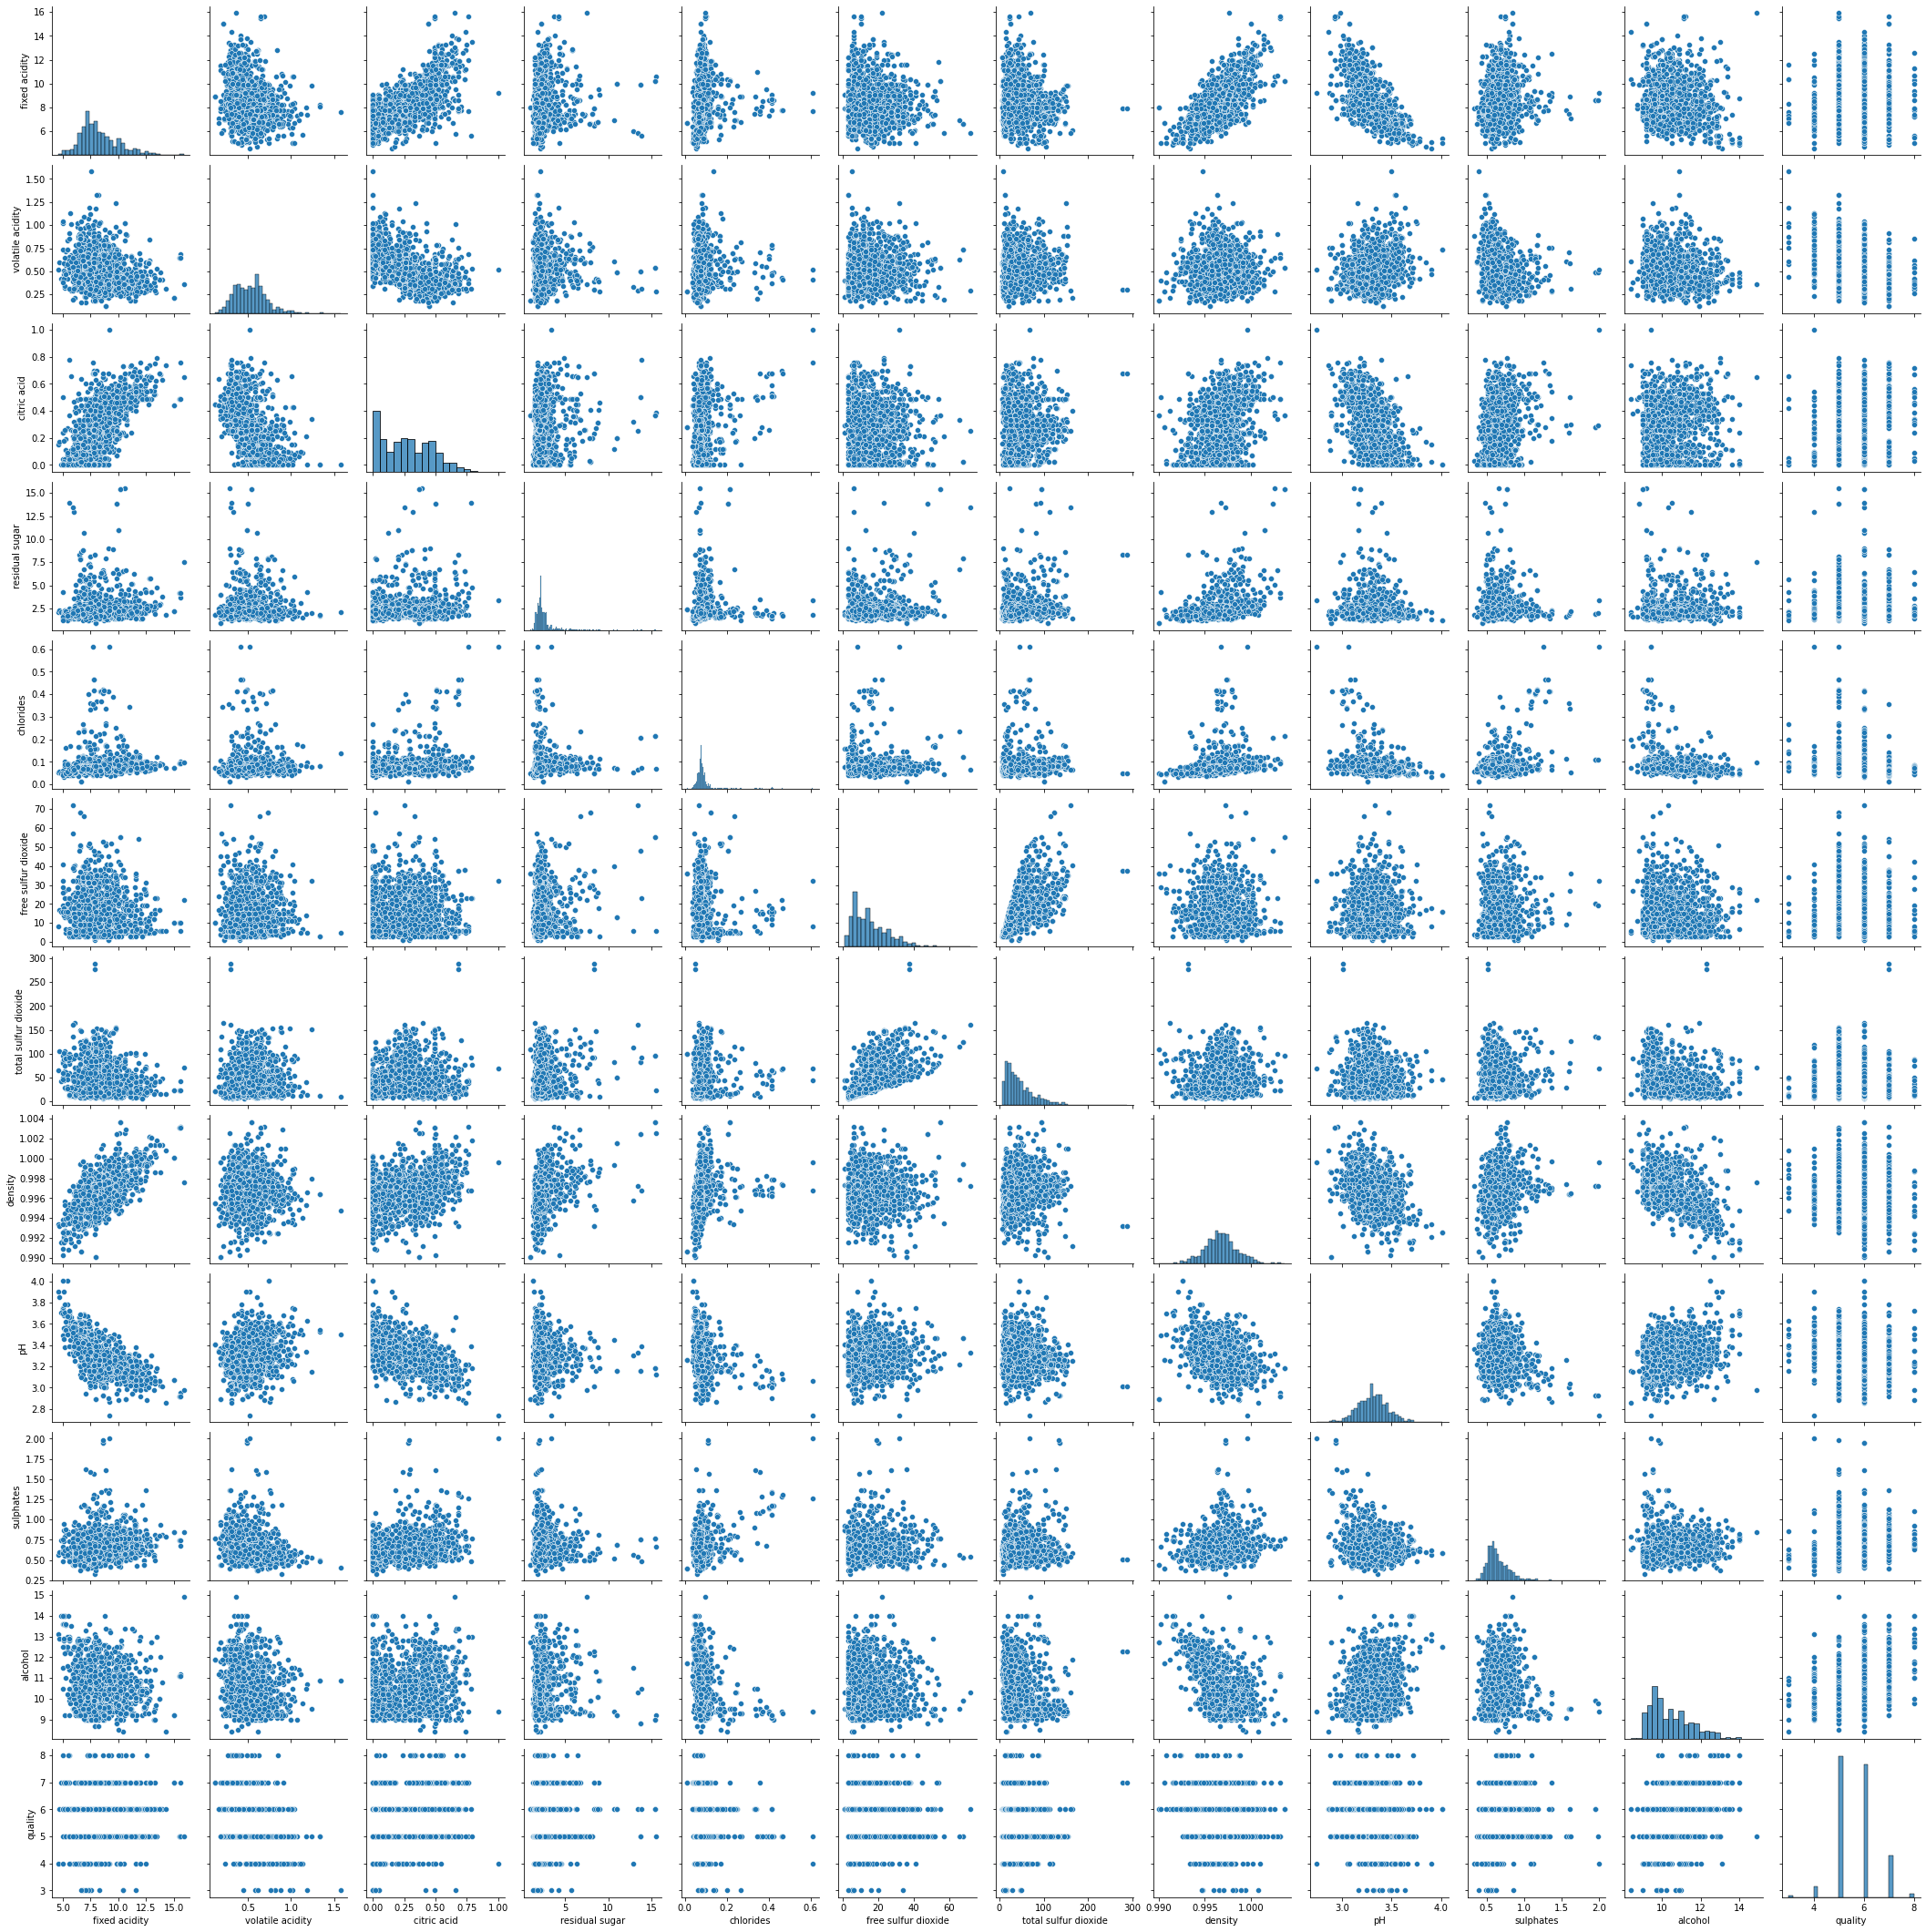

In [15]:
sns.pairplot(df)

In [16]:
# Create Classification version of target variable
df['goodquality'] = [2 if x >= 7 else 1 if x==6 else 0 for x in df['quality']]

# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

In [1]:
# Correlation Matrix
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

NameError: name 'df' is not defined

In [17]:
# See proportion of good vs bad wines
df['goodquality'].value_counts()

0    744
1    638
2    217
Name: goodquality, dtype: int64

In [18]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [19]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

# Modeling

## Decision Tree

In [20]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       185
           1       0.65      0.62      0.64       170
           2       0.43      0.56      0.49        45

    accuracy                           0.67       400
   macro avg       0.62      0.64      0.62       400
weighted avg       0.68      0.67      0.67       400



Successful Replication

## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       185
           1       0.68      0.69      0.69       170
           2       0.62      0.64      0.63        45

    accuracy                           0.72       400
   macro avg       0.70      0.70      0.70       400
weighted avg       0.72      0.72      0.72       400



Successful Replication

## AdaBoost

In [22]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       185
           1       0.61      0.57      0.59       170
           2       0.47      0.62      0.53        45

    accuracy                           0.64       400
   macro avg       0.60      0.64      0.61       400
weighted avg       0.65      0.64      0.64       400



Successful Replication

## Gradient Boosting

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       185
           1       0.63      0.60      0.61       170
           2       0.50      0.53      0.52        45

    accuracy                           0.66       400
   macro avg       0.62      0.63      0.62       400
weighted avg       0.66      0.66      0.66       400



Successful Replication

## XGBoost

In [24]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       185
           1       0.74      0.66      0.70       170
           2       0.63      0.73      0.68        45

    accuracy                           0.74       400
   macro avg       0.72      0.74      0.72       400
weighted avg       0.74      0.74      0.74       400



Successful Replication

# Feature Importance

## Random Forest

<AxesSubplot:>

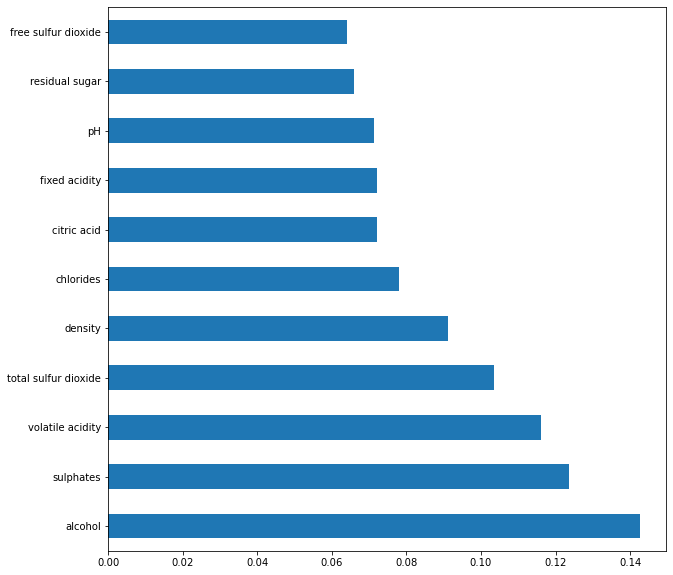

In [25]:
feat_importances = pd.Series(model2.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

## XGBoost

<AxesSubplot:>

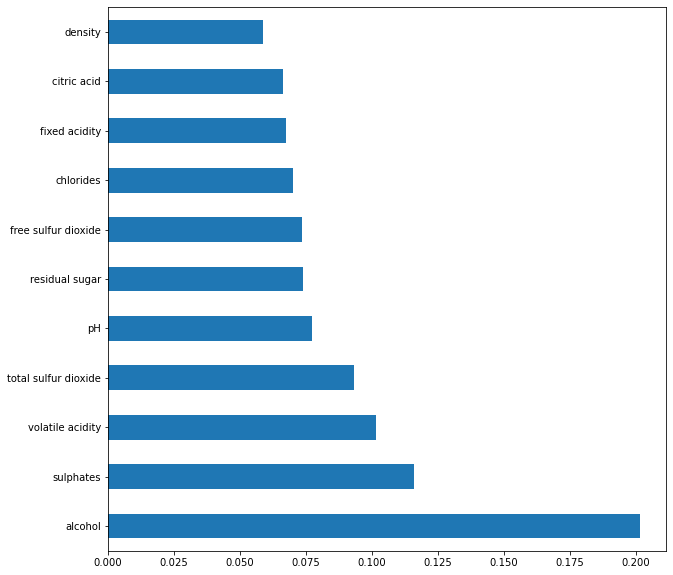

In [26]:
feat_importances = pd.Series(model5.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

## Comparing the Top 4 Features

In [27]:
# Filtering df for only good quality
df_temp = df[df['goodquality']==1]
df_temp.describe()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.0,638.0
mean,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519,6.0,1.0
std,1.797849,0.160962,0.195108,1.441576,0.039563,9.940911,25.038250,0.002000,0.153995,0.158650,1.049639,0.0,0.0
min,4.700000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.860000,0.400000,8.400000,6.0,1.0
25%,7.000000,0.380000,0.090000,1.900000,0.068250,8.000000,23.000000,0.995402,3.220000,0.580000,9.800000,6.0,1.0
50%,7.900000,0.490000,0.260000,2.200000,0.078000,14.000000,35.000000,0.996560,3.320000,0.640000,10.500000,6.0,1.0
75%,9.400000,0.600000,0.430000,2.500000,0.088000,21.000000,54.000000,0.997893,3.410000,0.750000,11.300000,6.0,1.0
max,14.300000,1.040000,0.780000,15.400000,0.415000,72.000000,165.000000,1.003690,4.010000,1.950000,14.000000,6.0,1.0


In [28]:
# Filtering df for only bad quality
df_temp2 = df[df['goodquality']==0]
df_temp2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,744.000000,744.000000,744.000000,744.00000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.0
mean,8.142204,0.589503,0.237755,2.54207,0.092989,16.567204,54.645161,0.997068,3.311653,0.618535,9.926478,4.901882,0.0
std,1.572396,0.177956,0.183368,1.39355,0.055781,10.890291,36.720468,0.001598,0.154296,0.176194,0.758007,0.339894,0.0
min,4.600000,0.180000,0.000000,1.20000,0.039000,3.000000,6.000000,0.992560,2.740000,0.330000,8.400000,3.000000,0.0
25%,7.100000,0.460000,0.080000,1.90000,0.074000,8.000000,23.750000,0.996120,3.200000,0.520000,9.400000,5.000000,0.0
50%,7.800000,0.590000,0.220000,2.20000,0.081000,14.000000,45.000000,0.996935,3.310000,0.580000,9.700000,5.000000,0.0
75%,8.900000,0.680000,0.360000,2.60000,0.094000,23.000000,78.000000,0.997900,3.400000,0.650000,10.300000,5.000000,0.0
max,15.900000,1.580000,1.000000,15.50000,0.611000,68.000000,155.000000,1.003150,3.900000,2.000000,14.900000,5.000000,0.0


## Neural Network Trials

In [50]:
import tensorflow as tf
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=16, activation="sigmoid", input_dim=11))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=4, activation="relu"))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=4, activation="tanh"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=3, activation="softmax"))

# Check the structure of the model
nn_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                192       
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_18 (Dense)             (None, 3)                 15        
Total params: 295
Trainable params: 295
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Compile the model
nn_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [52]:
# Train the model
fit_model = nn_model.fit(X_train, y_train, epochs=50)

Epoch 1/50
1199/1199 [==============================] - 0s 394us/sample - loss: 1.0592 - acc: 0.4295
Epoch 2/50
1199/1199 [==============================] - 0s 100us/sample - loss: 1.0136 - acc: 0.4662
Epoch 3/50
1199/1199 [==============================] - 0s 110us/sample - loss: 0.9898 - acc: 0.4662
Epoch 4/50
1199/1199 [==============================] - 0s 97us/sample - loss: 0.9701 - acc: 0.4887
Epoch 5/50
1199/1199 [==============================] - 0s 84us/sample - loss: 0.9529 - acc: 0.4887
Epoch 6/50
1199/1199 [==============================] - 0s 120us/sample - loss: 0.9358 - acc: 0.5538
Epoch 7/50
1199/1199 [==============================] - 0s 84us/sample - loss: 0.9184 - acc: 0.5721
Epoch 8/50
1199/1199 [==============================] - 0s 83us/sample - loss: 0.8992 - acc: 0.5763
Epoch 9/50
1199/1199 [==============================] - 0s 80us/sample - loss: 0.8785 - acc: 0.5788
Epoch 10/50
1199/1199 [==============================] - 0s 89us/sample - loss: 0.8549 - acc: 0.

In [53]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

400/400 - 0s - loss: 0.7390 - acc: 0.6450
Loss: 0.7390473222732544, Accuracy: 0.6449999809265137
